# Exploreation Notebook for why customers churn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import get_db_url
import split_scale
import explore

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import wrangle_telco
train, test, features, target = wrangle_telco.clean_telco_data()

In [18]:
train.shape
train[features].head()

,partner,dependents,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,Month-to-month,One year,Two year,DSL,Fiber optic,None
4287,False,False,70,False,False,False,False,True,True,True,45.25,0,1,0,1,0,0
5954,True,False,46,True,False,True,True,False,False,False,40.40,0,0,1,1,0,0
3976,True,False,71,True,True,True,True,True,True,False,66.80,0,1,0,1,0,0
2595,True,False,59,False,False,True,True,True,False,False,93.35,1,0,0,0,1,0
6696,True,False,70,False,False,False,False,False,False,False,24.25,0,0,1,0,0,1


## Questions to be addressted

- Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

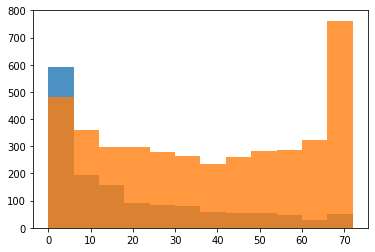

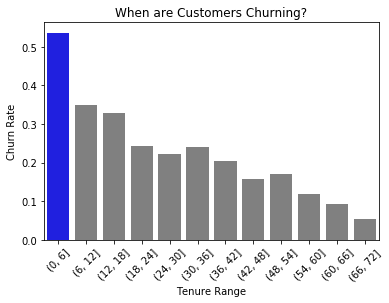

In [8]:
hist_data = train[['churn']].groupby([pd.cut(train.tenure, bins)]).mean()
clrs = ['grey' if (x < max(hist_data.churn)) else 'blue' for x in hist_data.churn ]
sns.barplot(x = hist_data.index.tolist(), y = hist_data.churn, palette = clrs)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Range')
plt.xticks(rotation = 45)
plt.title('When are Customers Churning?')
plt.show()


- Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
    - yes. **partner, dependants, online_security, online_backup, tech_support, paperless_billing, internet_service_type, contract_type,** and **payment_type**  all have large impacts on churn

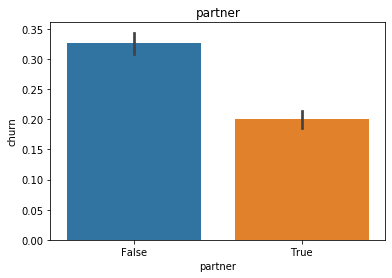

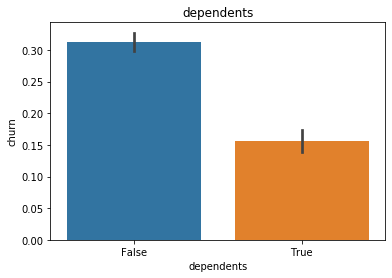

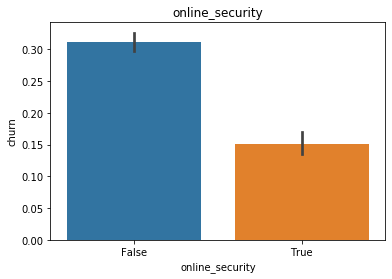

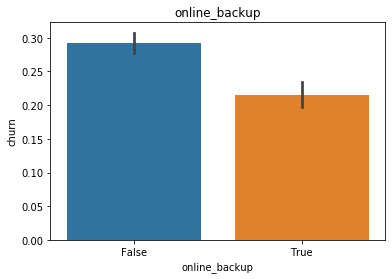

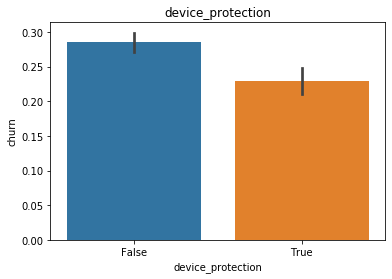

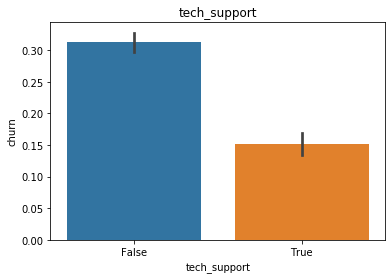

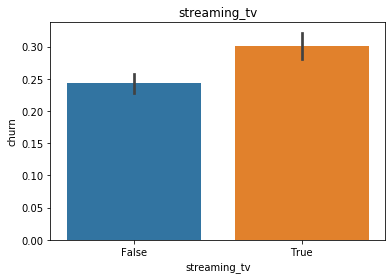

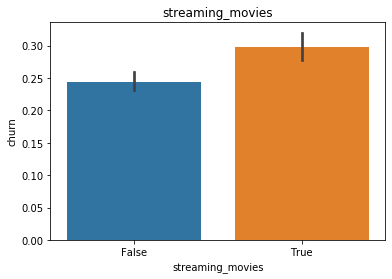

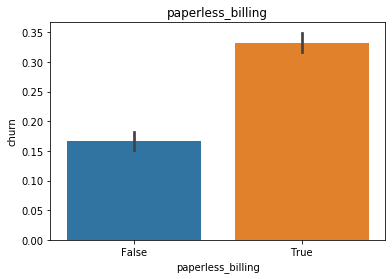

In [19]:
explore.plot_bars(features, target, train)

- Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

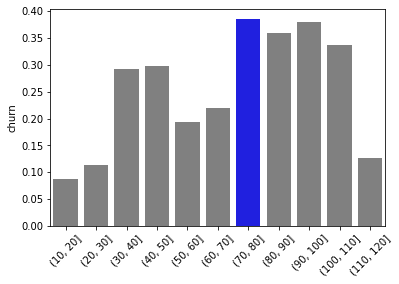

In [22]:
bins = range(10,130,10)
hist_data = train[['churn']].groupby([pd.cut(train.monthly_charges, bins)]).mean()
hist_data
clrs = ['grey' if (x < max(hist_data.churn)) else 'blue' for x in hist_data.churn ]
sns.barplot(x = hist_data.index.tolist(), y = hist_data.churn, palette = clrs)
plt.xticks(rotation = 45)
plt.show()

- If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

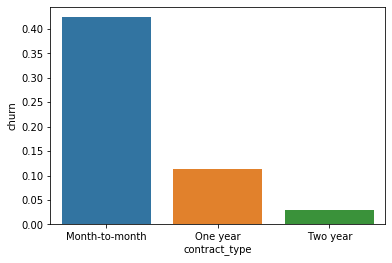

In [25]:
bars = train.groupby('contract_type').churn.mean()
sns.barplot(x = bars.index, y = bars)

- Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

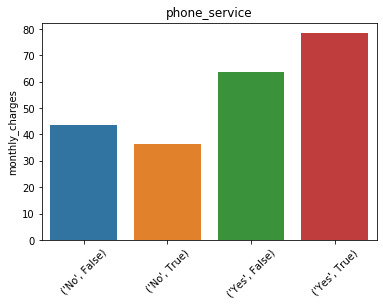

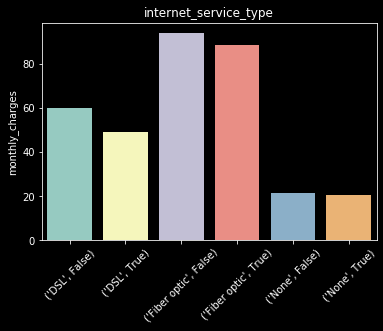

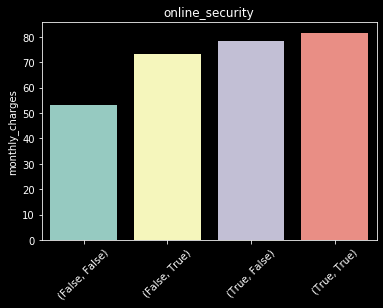

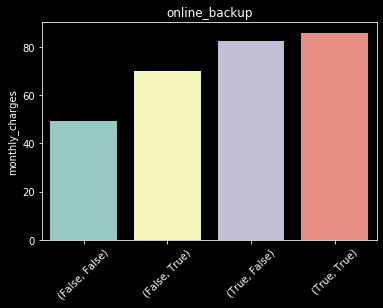

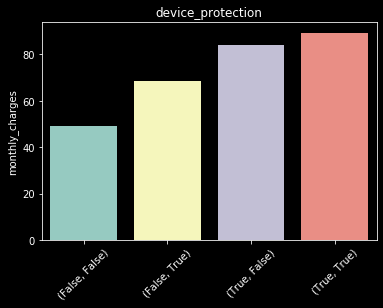

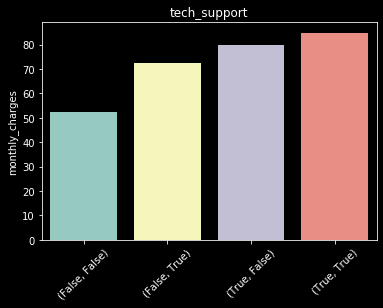

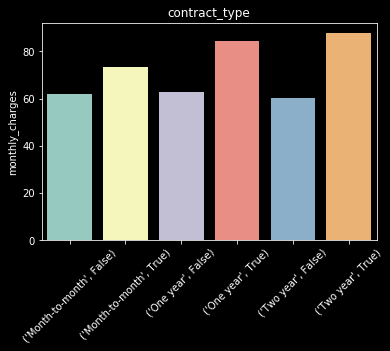

In [26]:
services = ['phone_service', 'internet_service_type', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'contract_type']
for i in services:
    bars = train.groupby([i, 'churn']).monthly_charges.mean()
    sns.barplot(x = bars.index, y = bars)
    plt.title(i)
    plt.xticks(rotation = 45)
    plt.style.use("dark_background")

    plt.show()

- How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

In [ ]:
#h_0 that internet service type correlates strongly with 

- How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

- Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

- What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

- Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

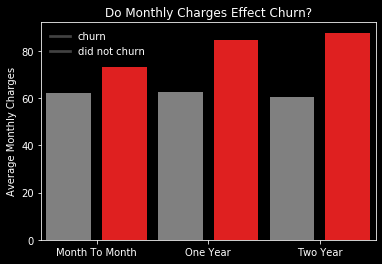

In [60]:
bars = train.groupby(['contract_type','churn']).monthly_charges.mean()
sns.barplot(x = bars.index, y = bars, palette = ['grey', 'red'] * 3)
plt.xticks(ticks= [.5,2.5,4.5], labels = ['Month To Month','One Year', 'Two Year'])
plt.ylabel('Average Monthly Charges')
plt.title('Do Monthly Charges Effect Churn?')
plt.legend(['churn','did not churn'], frameon = False)